# Mall Customers Segmentation


>[Mall Customers Segmentation](#scrollTo=zLa4m9giHxsK)

>>[Importing](#scrollTo=tu1tT4cHXRG_)

>>>[Importing libraries](#scrollTo=rj0ml82jmEMD)

>>>[Import dataset file](#scrollTo=Tw-GYL8_XWdT)

>>[Describing Dataset](#scrollTo=8705WBnjXiQy)

>>>[Plot for each 2 attributes](#scrollTo=p6zmFtcdZOES)

>>>[Each feature distribution](#scrollTo=VlwGdVSdj2AS)

>>[K-means Clustering](#scrollTo=rgnHrfwJHxtJ)

>>>[Elbow method](#scrollTo=2VtNzTaLHxtS)

>>>[Implementing K-Means Algorithm](#scrollTo=4ruw8epMkkIU)

>>[Result](#scrollTo=lYHTkVHpHxtU)



## Importing

### Importing libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly as py
import plotly.graph_objs as go

### Import dataset file

In [10]:
df = pd.read_csv("Mall_Customers.csv", index_col="CustomerID")


## Describing Dataset

In [11]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [12]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


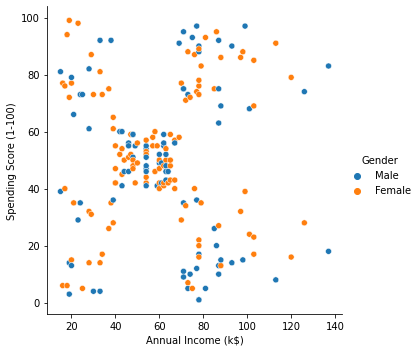

In [13]:
sns.relplot(data=df, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue='Gender')

In [14]:
df.drop(columns=['Gender'], inplace=True)

In [15]:
df2= df.copy()

### Plot for each 2 attributes

<Figure size 432x288 with 0 Axes>

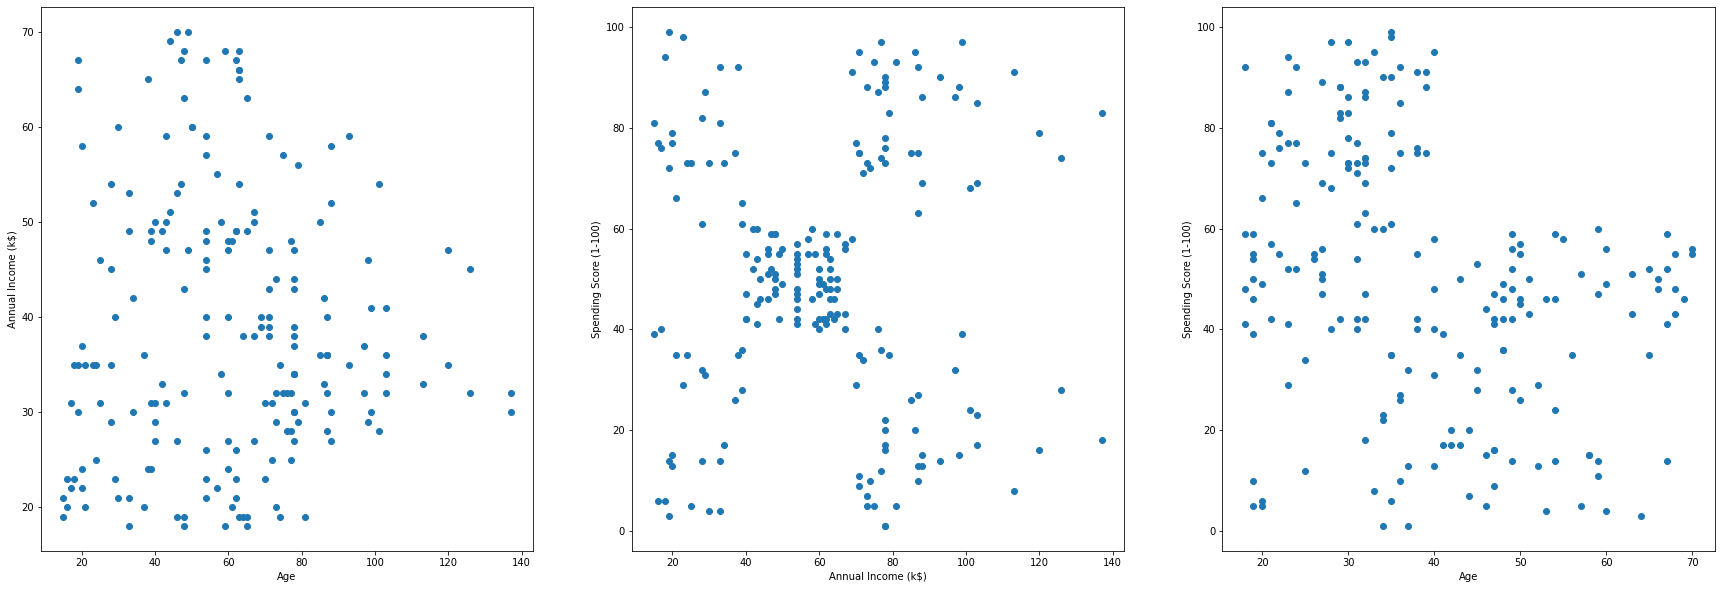

In [16]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 1, ncols = 3 ,figsize=(30,10))
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Annual Income (k$)")
axes[0].scatter(
        df2["Annual Income (k$)"],
        df2["Age"]
        )

axes[1].set_xlabel("Annual Income (k$)")
axes[1].set_ylabel("Spending Score (1-100)")
axes[1].scatter(
        df2["Annual Income (k$)"],
        df2["Spending Score (1-100)"]
        )

axes[2].set_xlabel("Age")
axes[2].set_ylabel("Spending Score (1-100)")
axes[2].scatter(
        df2["Age"],
        df2["Spending Score (1-100)"]
        )
plt.show()

### Each feature distribution

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

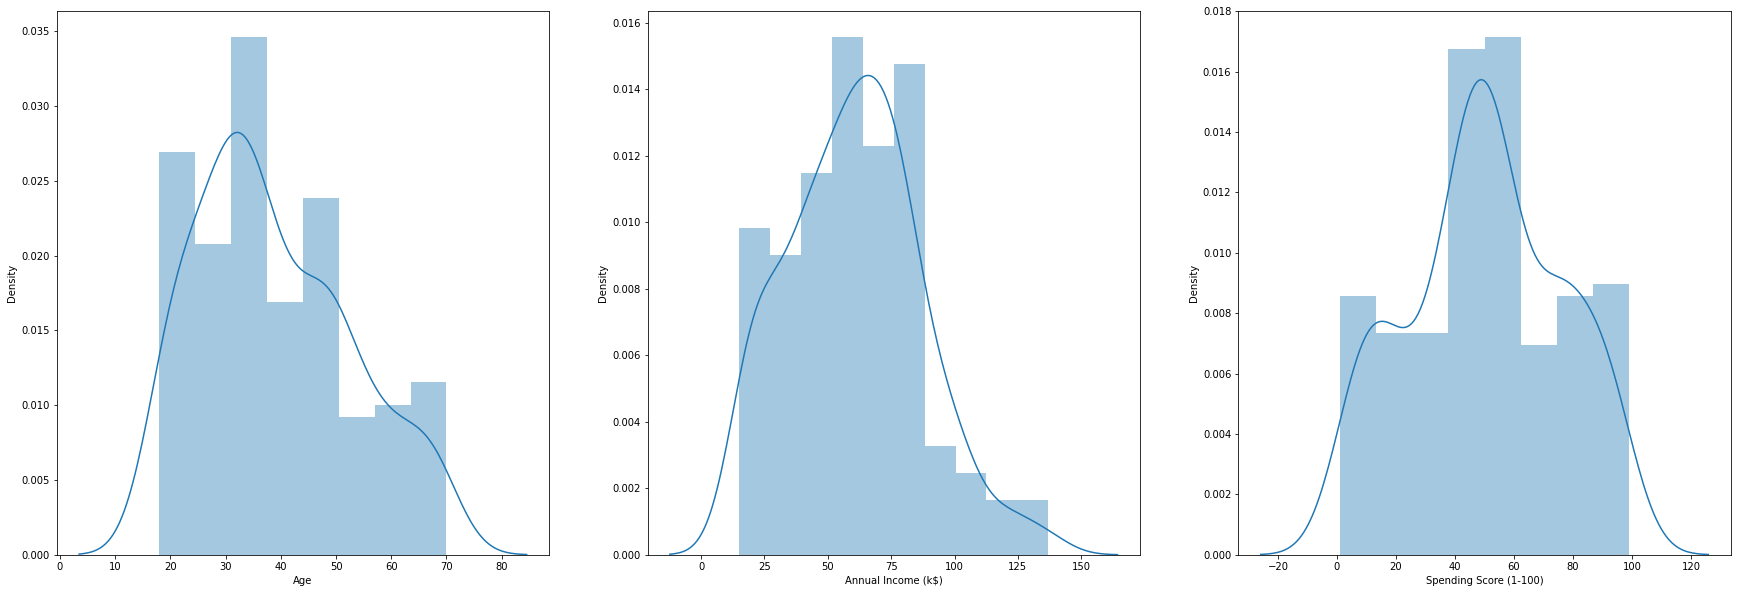

In [17]:
f, axes = plt.subplots(nrows = 1, ncols = 3 ,figsize=(30,10))
sns.distplot(df["Age"], ax=axes[0])
sns.distplot(df["Annual Income (k$)"], ax=axes[1])
sns.distplot(df["Spending Score (1-100)"], ax=axes[2])

## K-means Clustering
Client Segmentation with All 3 Features

### Elbow method

In [18]:
sum_of_sqr_dist = {}

for k in range(1, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(df2)
    sum_of_sqr_dist[k] = km.inertia_

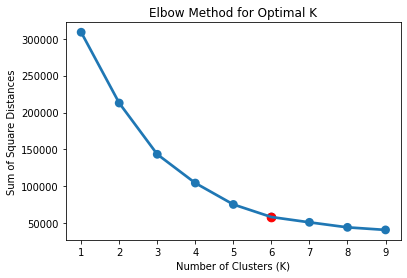

In [19]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")
plt.scatter(x = 5 , y = 58300.44332159069, color = "red" ,s=75)
plt.show()

### Implementing K-Means Algorithm

In [20]:
Model2 = KMeans(n_clusters=6, init='k-means++', max_iter=1000)
Model2.fit(df2)

KMeans(max_iter=1000, n_clusters=6)

In [21]:
df2['Cluster'] = Model2.fit_predict(df2)
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,
1,19,15,39,0
2,21,15,81,5
3,20,16,6,0
4,23,16,77,5
5,31,17,40,0


## Result

In [22]:
labels = Model2.labels_
centroids = Model2.cluster_centers_
pd.DataFrame(centroids, columns=['Age', 'Annual Income', 'Spending Score'])

,Age,Annual Income,Spending Score
0,44.142857,25.142857,19.523810
1,32.692308,86.538462,82.128205
2,56.155556,53.377778,49.088889
3,41.685714,88.228571,17.285714
4,27.000000,56.657895,49.131579
5,25.272727,25.727273,79.363636


In [23]:
df2['labels'] = labels
Color = ['#3D1766', '#0081C9', '#3C6255', '#FFB100',  '#850000', '#EB6440']
df2['Color'] = df2['Cluster'].map(lambda p:Color[p])

trace = go.Scatter3d(
                    x = df2['Age'],
                    y = df2['Annual Income (k$)'],
                    z = df2['Spending Score (1-100)'],
                    mode = 'markers',
                    marker=dict(color=df2["Color"], size = 5, line=dict(color=df2['Color'], width=12), opacity=0.8)
                    )
    
data = [trace]
layout = go.Layout(
                    title='Clusters',
                    scene= dict(
                                xaxis = dict(title = 'Age'),
                                yaxis = dict(title = 'Annual Income (k$)'),
                                zaxis = dict(title = 'Spending Score (1-100)'))
                                )

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
plt.show()

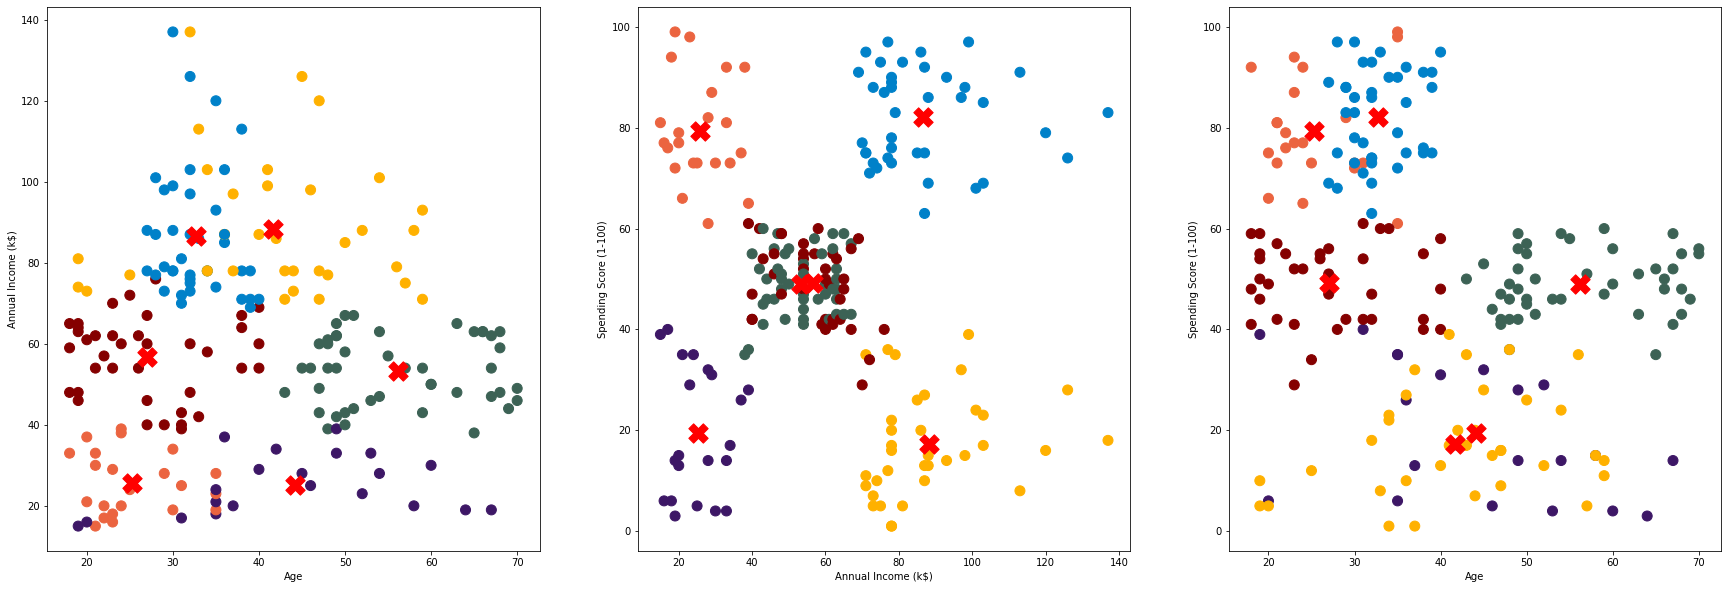

In [24]:
f, axes = plt.subplots(nrows = 1, ncols = 3 ,figsize=(30,10))

Color = ['#3D1766', '#0081C9', '#3C6255', '#FFB100',  '#850000', '#EB6440']
df2['Color'] = df2['Cluster'].map(lambda p:Color[p])
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Annual Income (k$)")
axes[0].scatter(df2["Age"],
           df2["Annual Income (k$)"],
           c=df2["Color"], s=100)
axes[0].scatter(centroids[:,0], centroids[:,1], c="red", s=375, marker="X")

df2['Color'] = df2['Cluster'].map(lambda p:Color[p])
axes[1].set_xlabel("Annual Income (k$)")
axes[1].set_ylabel("Spending Score (1-100)")
axes[1].scatter(df2["Annual Income (k$)"],
           df2["Spending Score (1-100)"],
           c=df2["Color"], s=100)
axes[1].scatter(centroids[:,1], centroids[:,2], c="red", s=375 , marker="X")

df2['Color'] = df2['Cluster'].map(lambda p:Color[p])
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Spending Score (1-100)")
axes[2].scatter(df2["Age"],
           df2["Spending Score (1-100)"],
           c=df2["Color"], s=100)
axes[2].scatter(centroids[:,0], centroids[:,2], c="red", s=375, marker="X")

plt.show()

Convert ipynb to html

In [ ]:
%%shell
jupyter nbconvert --to html "/content/Final_Code (3).ipynb"

[NbConvertApp] Converting notebook /content/Final_Code (3).ipynb to html
[NbConvertApp] Writing 764258 bytes to /content/Final_Code (3).html
